# **Influences on Medmo Booking Rates**
### Name: Zoe Birnbaum
### Link to Github Pages: https://zbirnbaum.github.io/  

A note for professor and TAs: refer to your email for a notebook containing more information about the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in data set from excel file:

In [2]:
df = pd.read_excel('ds_proj.xlsx')

## Project Goals
The goal of this project is to determine what factors influence booking rates at Medmo Inc., a healthcare in tech company. Medmo facilitates radiology appointments for their clients, both B2B and B2C. I, Zoe Birnbaum, will be analyzing their data set of all appointment requests to discover correlations between variables to identify what influences the likelihood that a requested appointment is booked.

In terms of my working timeline, I plan to touch base with this project at least 2x per week until completion. I will be working in Python notebooks on Google CoLab, as well as publishing all milestones and final works to my public repository linked above. Additionally, I plan to connect with the company biweekly with project progress and updates. I have already met with them to discuss the statistics and questions they hope to have answered by the time of project completion.

## The Data Set
This data includes all requested appointments from the company's portal from April 2018 through February 2024. Attached to each request is information regarding geographic location of the patient, type of scan/appointment, B2B vs. B2C, stage of request, date and time of request (and booking, if applicable), and more. I chose to work with this data set because of my experience working with the company and personal interest in the healthcare in tech field. The set provides a sufficient amount of data, information, and variables to allow me to follow my goal for this project.

## RQ1
One question I hope to answer with this data:

Is there a correlation between successful bookings and geographic location of the client?

## Cleaning up the data

Since each observation is identified by the request ID, I'll make `TestRequestID` the index:

In [3]:
df.set_index("TestRequestID", inplace = True)

`StageID` directly corresponds to `StageName`, so I'll drop the column since it's redundant to have both. I'll also drop the `Latitude` and `Longitude` columns, since the data set already includes the state and zip code.

In [4]:
df = df.drop(columns=['StageID', 'Latitude', 'Longitude'])

The column `HasReportFile` is currently represented as Boolean (1 and 0), but would be more readable with values "Yes" and "No" instead.

In [5]:
df['HasReportFile'] = df['HasReportFile'].map({
    0: "No",
    1: "Yes"
})

## First workings with the data:

Since I am interested in the relationship between successful bookings and geographic location, I'll start by taking a look at data related to requests by state:

In [6]:
df[["State"]].describe()

,State
count,75390
unique,49
top,NY
freq,45374


New York leads the states in the total amount of requests at 45,374, which is 59.77% of all requests:

In [7]:
percent = (df['State'].value_counts()["NY"]) / (len(df))
print(f"{percent:.2%}")

59.77%


Next, I'll generate a graph showing the percentage distribution of requests by state:

In [8]:
state_counts = df['State'].value_counts()
state_percentages = state_counts / (len(df)) * 100

<Axes: xlabel='State', ylabel='Percentage of test requests'>

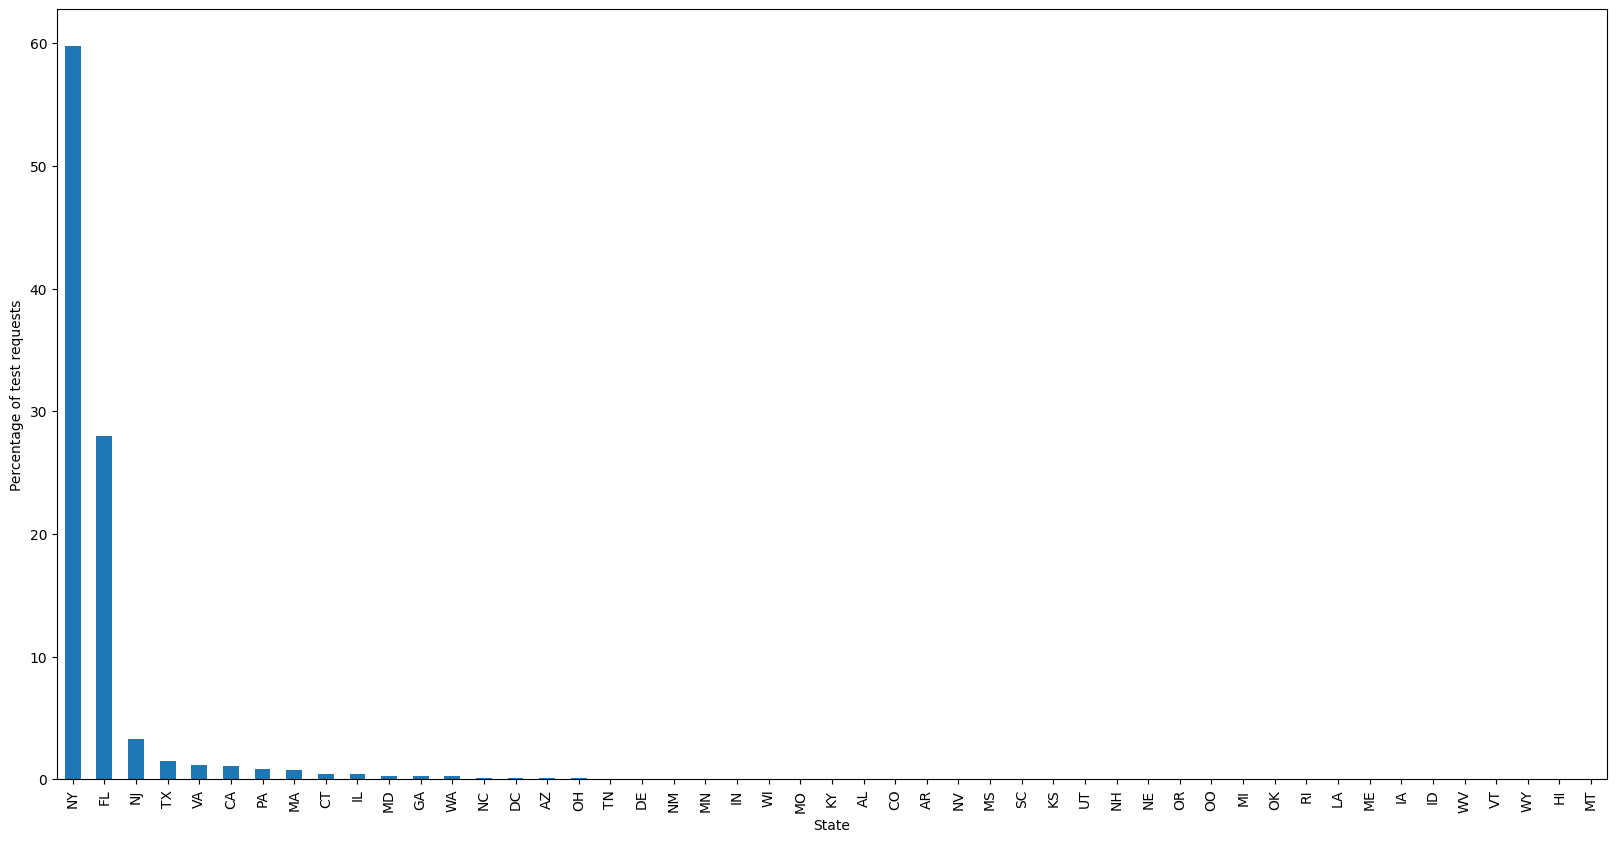

In [9]:
state_percentages.plot.bar(figsize=(20, 10), ylabel='Percentage of test requests', xlabel='State')

The leading states are New York, Florida, and New Jersey. XXX

